In [2]:
from IPython.display import HTML

html_content = """
<div style="background-color: #f4f4f4; border: 2px solid #4a90e2; border-radius: 12px; padding: 30px; text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
  <h1 style="font-family: Verdana, sans-serif; color: #4a90e2; font-size: 40px; margin-bottom: 10px;">
    Data Mining Project: Part 1
  </h1>
  <h2 style="font-family: Arial, sans-serif; color: #333333; font-size: 28px; margin-bottom: 20px;">
    Exploratory Data Analysis
  </h2>
  <hr style="border: 1px solid #cccccc; margin: 20px 0;">
  <h3 style="font-family: Tahoma, sans-serif; color: #666666; font-size: 22px;">
    2024/2025
  </h3>
</div>
"""

# Display the HTML
HTML(html_content)


##### Maria Pereira 20240314  
##### Miguel Mangerona 20240595  
##### Rita Morgadito 20240611  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Initial analysis of the data set ### 

In [4]:
df=pd.read_csv("DM2425_ABCDEats_DATASET.csv")

In [5]:
df.head(15)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,...,0,0,0,1,0,0,0,0,0,0
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,...,0,1,0,0,0,0,0,0,0,0
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,...,0,0,0,1,0,1,0,0,0,1
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [22]:
#Checking statistics of the columns with object type
df.describe(include="object").T

,count,unique,top,freq
customer_region,31444,8,8670,9761
last_promo,31886,4,-,16748
payment_method,31886,3,CARD,20161


In [24]:
#Checking statistics of the columns with numerical type
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31159.0,27.506531,7.161127,15.0,23.0,26.0,31.00,80.00
vendor_count,31886.0,3.102678,2.771661,0.0,1.0,2.0,4.00,41.00
product_count,31886.0,5.668475,6.957445,0.0,2.0,3.0,7.00,269.00
is_chain,31886.0,2.819043,3.977591,0.0,1.0,2.0,3.00,83.00
first_order,31780.0,28.476180,24.107907,0.0,7.0,22.0,45.00,90.00
last_order,31886.0,63.673932,23.225986,0.0,49.0,70.0,83.00,90.00
CUI_American,31886.0,4.880744,11.654319,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31886.0,9.960699,23.565070,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31886.0,2.299994,8.479616,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31886.0,0.801213,6.427331,0.0,0.0,0.0,0.00,326.10


### Search for trends, patterns, or anomalies within the dataset ###


In [7]:
#Checking for missing values
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [9]:
#Visualizing which regions exist
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [10]:
#Replacing empty customer regions with Nan
df["customer_region"]=df["customer_region"].replace("-",np.nan)

In [11]:
#Checking if there are any duplicated values in the column customer id
print(df['customer_id'].duplicated().sum())

13


In [12]:
#Concatenate those columns
pd.concat(identifier for _, identifier in df.groupby('customer_id') if len(identifier) > 1)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
28706,06018a56be,8550,27.0,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
28713,06018a56be,8550,27.0,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
27653,201a13a34d,8550,28.0,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
27739,201a13a34d,8550,28.0,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
24822,6bbf5f74cd,8550,22.0,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24827,6bbf5f74cd,8550,22.0,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Showing which are the not numerical columns, and their corresponding values (unique values only)
non_numerical_columns = df.select_dtypes(exclude=['number']).columns

for column in non_numerical_columns:
    unique_values = df[column].unique()
    print(f"Column name: {column}")
    print(f"Corresponding values: {unique_values}\n")


Column name: customer_id
Corresponding values: ['1b8f824d5e' '5d272b9dcb' 'f6d1b2ba63' ... 'f74ad8ce3f' 'f7b19c0241'
 'fd40d3b0e0']

Column name: customer_region
Corresponding values: ['2360' '8670' '4660' '2440' nan '4140' '2490' '8370' '8550']

Column name: last_promo
Corresponding values: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']

Column name: payment_method
Corresponding values: ['DIGI' 'CASH' 'CARD']



In [14]:
claimMode = df['customer_id'].mode()
claimDateModeIndex = list(df[df['customer_id'] == claimMode[0]].index)
claimDateModeIndex 
#Não percebi o que fizemos aqui

[28706, 28713]

In [15]:
df.drop(claimDateModeIndex, inplace=True)
#mesma coisa

In [16]:
#Setting the customer id as the index of the df
df.set_index('customer_id', inplace=True)

In [17]:
#Showing the duplicated rows
df[df.duplicated()==True]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
4336560739,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,1,0,0,0
dcc76a0a1b,4660,32.0,3,4,3,1.0,43,-,CARD,10.15,...,0,1,2,0,0,0,0,0,0,0
b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,...,0,0,0,0,0,0,0,0,0,0
a59a79af83,4660,25.0,4,5,5,3.0,69,-,CARD,11.59,...,0,1,1,2,0,0,1,0,0,0
49a726df01,2360,29.0,11,39,24,3.0,75,DELIVERY,CARD,0.00,...,3,2,1,1,1,0,1,0,0,1
ef521b81c9,2360,35.0,4,14,6,3.0,83,DISCOUNT,CARD,0.00,...,0,2,1,1,0,0,1,1,1,0
726f00c63b,2360,32.0,9,16,9,4.0,88,-,CARD,3.62,...,0,1,2,1,0,0,1,0,3,0
f841c19db0,8670,19.0,6,11,7,6.0,63,-,DIGI,5.71,...,5,0,0,0,0,0,0,0,0,0
7a6db42ede,4660,31.0,4,6,4,7.0,84,FREEBIE,CARD,22.95,...,0,0,1,0,0,0,0,0,0,0


In [18]:
#Antes de fazer os gráficos devíamos adicionar colunas relevantes como eles têm

### Creating new features ###

#### Order Duration ####

In [27]:
#Creating a column that stores the calculation of days since the first order
df['order_duration'] = df['last_order'] - df['first_order']

#### Order Frequency ####

In [30]:
#Creating a column that stores the frequency of how often a customer places orders (based on their first_order and last_order values)
df['order_frequency'] = df['product_count'] / (df['last_order'] - df['first_order'] + 1) 

#### Prefered time of the day ####

In [40]:
df['preferred_order_hour'] = df[[f'HR_{i}' for i in range(24)]].idxmax(axis=1).str.replace('HR_', '').astype(int)

#### Prefered day of the week ####

In [47]:
df['preferred_order_day'] = df[[f'DOW_{i}' for i in range(7)]].idxmax(axis=1).str.replace('DOW_', '').astype(int)

#### Age group ####

In [54]:
#Creating a column that stores the age group to which the consumer belongs
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create the age_category column
df['age_category'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)

### Graphs ###

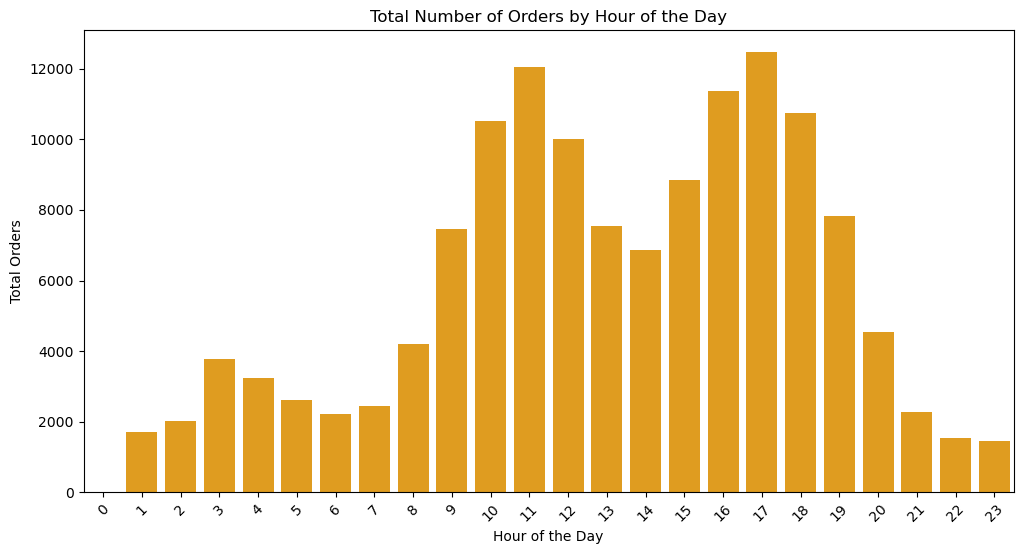

In [19]:

hourly_columns = [f'HR_{i}' for i in range(24)]

hourly_totals = df[hourly_columns].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_totals.index.str.replace("HR_", ""), y=hourly_totals.values, color="orange")

plt.title('Total Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


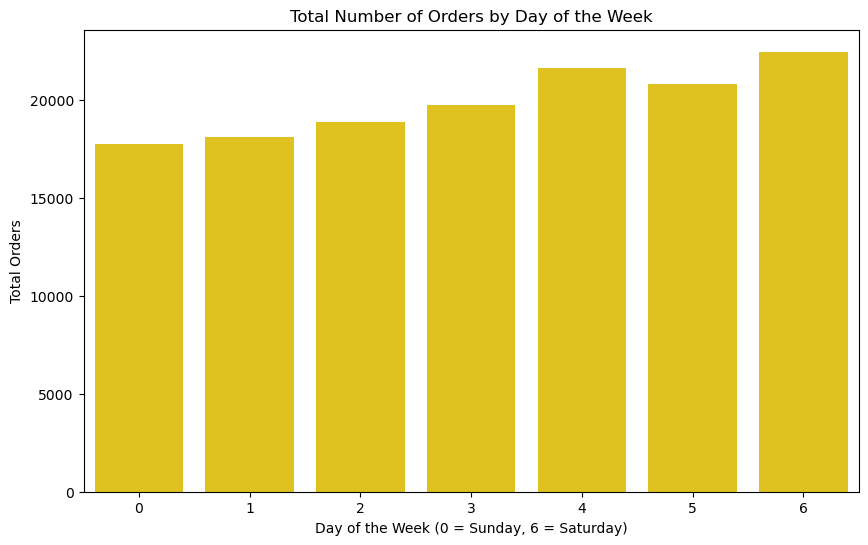

In [20]:
weekly_columns = [f'DOW_{i}' for i in range(7)]

weekly_totals = df[weekly_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_totals.index.str.replace("DOW_", ""), y=weekly_totals.values, color="gold")

plt.title('Total Number of Orders by Day of the Week')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Total Orders')
plt.show()


**Feature: age**

In [21]:
df['customer_age'].describe()

count    31159.000000
mean        27.506531
std          7.161127
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

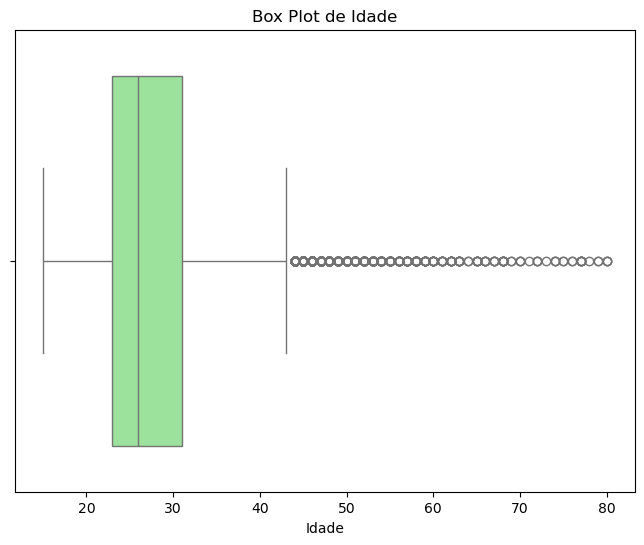

In [35]:

#ESTOU A INVENTAR AMIGUINHOS

# Verificar duplicatas no índice
if df.index.has_duplicates:
    df = df.reset_index(drop=True)  # Redefine o índice, removendo duplicatas


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['customer_age'], color='lightgreen')
plt.title('Box Plot de Idade')
plt.xlabel('Idade')
plt.show()